# National Park Biodiversity Project
This project was done through CodeAcademy's Data Science career path.

## Examine data
Here, I will load the csvs into pandas dataframes so I can inspect it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sp_info=pd.read_csv('species_info.csv')
observations=pd.read_csv('observations.csv')
print(sp_info.head())
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

It looks like the two dataframes share a common column: scientific_name. I will concatenate these two dataframes so that we can access the data through one dataframe.

In [2]:
df=pd.concat([sp_info,observations],ignore_index=True,sort=True)
print(len(df))
print(df.columns)
print(df.head())


29120
Index(['category', 'common_names', 'conservation_status', 'observations',
       'park_name', 'scientific_name'],
      dtype='object')
  category                                       common_names  \
0   Mammal                           Gapper's Red-Backed Vole   
1   Mammal                              American Bison, Bison   
2   Mammal  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...   
3   Mammal  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4   Mammal                                      Wapiti Or Elk   

  conservation_status  observations park_name                scientific_name  
0                 NaN           NaN       NaN  Clethrionomys gapperi gapperi  
1                 NaN           NaN       NaN                      Bos bison  
2                 NaN           NaN       NaN                     Bos taurus  
3                 NaN           NaN       NaN                     Ovis aries  
4                 NaN           NaN       NaN                 Cervus ela

I will also print the unique entries of each column.

In [3]:
columns=df.columns
for column in columns:
    unique_entries=pd.unique(df[column])
    print("The unique entries in the column "+column+" is:")
    print(unique_entries)
    print('')

The unique entries in the column category is:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant' nan]

The unique entries in the column common_names is:
["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur'
 nan]

The unique entries in the column conservation_status is:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

The unique entries in the column observations is:
[ nan  68.  77. 138.  84.  85. 112. 228.  39. 168. 250. 103. 114. 101.
 279.  72.  65. 143. 165. 150.  80.  83. 109. 158. 167. 135. 247.  73.
 261. 177. 117.  79.  96. 140. 116. 239. 262.  71. 176. 148.  76. 235.
 283.  25. 246.  64. 281.  88.  67. 254. 152. 147. 213. 265. 107. 156.
  47. 157.  89. 154. 127. 106.  75.  36. 137. 244.  63. 214.  92. 108.
  54. 105. 115.  98. 223.  82.  90

In the conservation_status column, nan might cause some issues when visualizing the data, and is not particularly descriptive. I will replace every nan with "No Concern".

In [4]:
df['conservation_status']=df["conservation_status"].fillna("No Concern")
print(df.head())

  category                                       common_names  \
0   Mammal                           Gapper's Red-Backed Vole   
1   Mammal                              American Bison, Bison   
2   Mammal  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...   
3   Mammal  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4   Mammal                                      Wapiti Or Elk   

  conservation_status  observations park_name                scientific_name  
0          No Concern           NaN       NaN  Clethrionomys gapperi gapperi  
1          No Concern           NaN       NaN                      Bos bison  
2          No Concern           NaN       NaN                     Bos taurus  
3          No Concern           NaN       NaN                     Ovis aries  
4          No Concern           NaN       NaN                 Cervus elaphus  


There are also nan values in the category column. I will examine them below:

In [5]:
df_category_nan=df[df['category'].isna()]
print(df_category_nan)
print(len(df_category_nan))

      category common_names conservation_status  observations  \
5824       NaN          NaN          No Concern          68.0   
5825       NaN          NaN          No Concern          77.0   
5826       NaN          NaN          No Concern         138.0   
5827       NaN          NaN          No Concern          84.0   
5828       NaN          NaN          No Concern          85.0   
...        ...          ...                 ...           ...   
29115      NaN          NaN          No Concern         173.0   
29116      NaN          NaN          No Concern         130.0   
29117      NaN          NaN          No Concern         140.0   
29118      NaN          NaN          No Concern         171.0   
29119      NaN          NaN          No Concern         164.0   

                                 park_name  \
5824   Great Smoky Mountains National Park   
5825   Great Smoky Mountains National Park   
5826                Yosemite National Park   
5827                   Bryce Nation

Those nan values may be problematic. Some of the species are for species that are extinct, or are miscategorized. I will remove them as they will cause problems for data visualization. 

In [6]:
df=df.dropna(subset=['category'])
print(df)

            category                                       common_names  \
0             Mammal                           Gapper's Red-Backed Vole   
1             Mammal                              American Bison, Bison   
2             Mammal  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...   
3             Mammal  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4             Mammal                                      Wapiti Or Elk   
...              ...                                                ...   
5819  Vascular Plant                                Parish's Nightshade   
5820  Vascular Plant            Chaparral Nightshade, Purple Nightshade   
5821  Vascular Plant        Thicket Creeper, Virginia Creeper, Woodbine   
5822  Vascular Plant            California Grape, California Wild Grape   
5823  Vascular Plant  Bullhead, Caltrop, Goathead, Mexican Sandbur, ...   

     conservation_status  observations park_name  \
0             No Concern           NaN       Na

To better understand what kind of animals are in each conservation status group, I will make a clustered bar chart to show the proportions of each conservation status group.

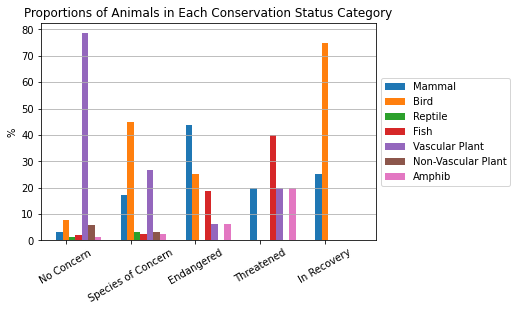

In [19]:
consv_list=pd.unique(df['conservation_status'])
def count_anims(sort):
    lst=[]
    for status in consv_list:
        df1=df[df['conservation_status']==status]
        lst.append(df1[df1['category']==sort].count()[0])
    return lst
x_labels=consv_list

y_mammal=count_anims('Mammal')
y_bird=count_anims('Bird')
y_reptile=count_anims('Reptile')
y_amphib=count_anims('Amphibian')
y_fish=count_anims('Fish')
y_vascplnt=count_anims('Vascular Plant')
y_nonvascplnt=count_anims('Nonvascular Plant')

def conv_percent(l1,l2,l3,l4,l5,l6,l7):
    lst=[]
    indexes=range(len(l1))
    for index in indexes:
        lst.append(l1[index]+l2[index]+l3[index]+l4[index]+l5[index]+l6[index]+l7[index])
    return lst
divisor_list=conv_percent(y_mammal,y_bird,y_reptile,y_amphib,y_fish,y_vascplnt,y_nonvascplnt)

y_mammal1=[i*100/j for i,j in zip(y_mammal,divisor_list)]
y_bird1=[i*100/j for i,j in zip(y_bird,divisor_list)]
y_reptile1=[i*100/j for i,j in zip(y_reptile,divisor_list)]
y_amphib1=[i*100/j for i,j in zip(y_amphib,divisor_list)]
y_fish1=[i*100/j for i,j in zip(y_fish,divisor_list)]
y_vascplnt1=[i*100/j for i,j in zip(y_vascplnt,divisor_list)]
y_nonvascplnt1=[i*100/j for i,j in zip(y_nonvascplnt,divisor_list)]

x_ticks=np.arange(len(x_labels))

width=.1

bar1=plt.bar(x_ticks,y_mammal1,width)
bar2=plt.bar(x_ticks+width,y_bird1,width)
bar3=plt.bar(x_ticks+width*2,y_reptile1,width)
bar4=plt.bar(x_ticks+width*3,y_fish1,width)
bar5=plt.bar(x_ticks+width*4,y_vascplnt1,width)
bar6=plt.bar(x_ticks+width*5,y_nonvascplnt1,width)
bar7=plt.bar(x_ticks+width*6,y_amphib1,width)
plt.legend((bar1,bar2,bar3,bar4,bar5,bar6,bar7),('Mammal','Bird','Reptile','Fish','Vascular Plant','Non-Vascular Plant','Amphib'),loc='center left',bbox_to_anchor=(1,0.5))
plt.xticks(x_ticks+width,x_labels)
plt.xticks(rotation=30)
plt.title('Proportions of Animals in Each Conservation Status Category')
plt.ylabel('%')
plt.grid(axis='y')
plt.show()

The following is what I have gathered from the plot.
1. Vascular plants make up the biggest proportion of species that are listed under the "No Concern" category.
2. Birds, mammals, and vasuclar plants make up the majority of the species under the "Species of Concern" category.
3. Mammals, birds, and fish make up the majority of the species under the "Endangered" category.
4. Fish, mammals, vascular plants, and amphibans make up all of the species under the "Endangered" category.
5. Fish represent the biggest category of animals placed under the "Endangered" category.
6. Birds make up a majority of the animals under the "In Recovery" category.

Now, I will make a similar graph where the categories on the x-axis are the animal categories.

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[0 1 2 3 4 5 6]
[176, 442, 74, 73, 116, 4424, 328]
[82.24299065420561, 84.83685220729366, 93.67088607594937, 91.25, 91.33858267716535, 98.97091722595079, 98.49849849849849]


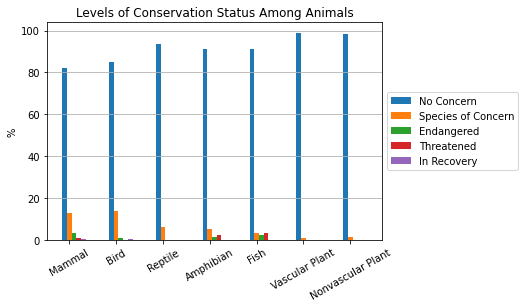

In [18]:
category_list=pd.unique(df['category'])
print(category_list)
def count_consv_stat(sort):
    lst=[]
    for animal in category_list:
        df1=df[df['category']==animal]
        lst.append(df1[df1['conservation_status']==sort].count()[0])
    return lst

y_no_con=count_consv_stat('No Concern')
y_soc=count_consv_stat('Species of Concern')
y_end=count_consv_stat("Endangered")
y_thr=count_consv_stat("Threatened")
y_ir=count_consv_stat("In Recovery")

def conv_percent2(l1,l2,l3,l4,l5):
    lst=[]
    indexes=range(len(l1))
    for index in indexes:
        lst.append(l1[index]+l2[index]+l3[index]+l4[index]+l5[index])
    return lst

divisior_list=conv_percent2(y_no_con,y_soc,y_end,y_thr,y_ir)

y_no_con1=[i*100/j for i,j in zip(y_no_con,divisior_list)]
y_soc1=[i*100/j for i,j in zip(y_soc,divisior_list)]
y_end1=[i*100/j for i,j in zip(y_end,divisior_list)]
y_thr1=[i*100/j for i,j in zip(y_thr,divisior_list)]
y_ir1=[i*100/j for i,j in zip(y_ir,divisior_list)]

x_ticks=np.arange(len(category_list))

width=.1
print(x_ticks)
print(y_no_con)
print(y_no_con1)
bar11=plt.bar(x_ticks,y_no_con1,width)
bar12=plt.bar(x_ticks+width,y_soc1,width)
bar13=plt.bar(x_ticks+width*2,y_end1,width)
bar14=plt.bar(x_ticks+width*3,y_thr1,width)
bar15=plt.bar(x_ticks+width*4,y_ir1,width)
plt.legend((bar11,bar12,bar13,bar14,bar15),('No Concern','Species of Concern','Endangered','Threatened','In Recovery'),loc='center left',bbox_to_anchor=(1,0.5))
plt.xticks(x_ticks+width,category_list)
plt.xticks(rotation=30)
plt.title('Levels of Conservation Status Among Animals')
plt.ylabel('%')
plt.grid(axis='y')
plt.show()

The "No Concern" category makes it hard to discern the data for the other conservation levels. I will make a new graph without the "No Concern" category.

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[0 1 2 3 4 5 6]
[176, 442, 74, 73, 116, 4424, 328]
[82.24299065420561, 84.83685220729366, 93.67088607594937, 91.25, 91.33858267716535, 98.97091722595079, 98.49849849849849]


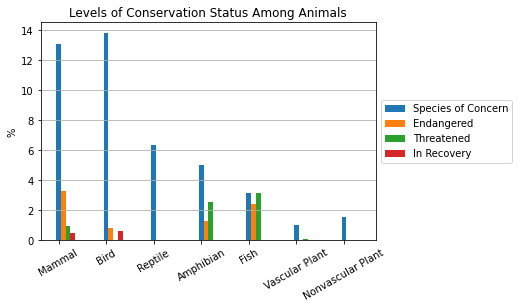

In [17]:
category_list=pd.unique(df['category'])
print(category_list)
def count_consv_stat(sort):
    lst=[]
    for animal in category_list:
        df1=df[df['category']==animal]
        lst.append(df1[df1['conservation_status']==sort].count()[0])
    return lst

y_soc=count_consv_stat('Species of Concern')
y_end=count_consv_stat("Endangered")
y_thr=count_consv_stat("Threatened")
y_ir=count_consv_stat("In Recovery")

def conv_percent3(l2,l3,l4,l5):
    lst=[]
    indexes=range(len(l2))
    for index in indexes:
        lst.append(l2[index]+l3[index]+l4[index]+l5[index])
    return lst

divisior_list=conv_percent2(y_no_con,y_soc,y_end,y_thr,y_ir)


y_soc1=[i*100/j for i,j in zip(y_soc,divisior_list)]
y_end1=[i*100/j for i,j in zip(y_end,divisior_list)]
y_thr1=[i*100/j for i,j in zip(y_thr,divisior_list)]
y_ir1=[i*100/j for i,j in zip(y_ir,divisior_list)]

x_ticks=np.arange(len(category_list))

width=.1
print(x_ticks)
print(y_no_con)
print(y_no_con1)

bar12=plt.bar(x_ticks+width,y_soc1,width)
bar13=plt.bar(x_ticks+width*2,y_end1,width)
bar14=plt.bar(x_ticks+width*3,y_thr1,width)
bar15=plt.bar(x_ticks+width*4,y_ir1,width)
plt.legend((bar12,bar13,bar14,bar15),('Species of Concern','Endangered','Threatened','In Recovery'),loc='center left',bbox_to_anchor=(1,0.5))
plt.xticks(x_ticks+width,category_list)
plt.xticks(rotation=30)
plt.title('Levels of Conservation Status Among Animals')
plt.ylabel('%')
plt.grid(axis='y')
plt.show()


We can gather the following based on the above two graphs:
1. Most species in each category are in the "No Concern" conservation status.
2. In mammals, around 13% of mammalian species are in the "Species of Concern" conservation status.
3. In birds, around 14% of mammalian species are in the "Species of Concern" conservation status.
4. Among reptiles, just above 6% of species are listed under the "Species of Concern" status.
5. In vascular and non-vascular plants, less than two percent of the category's species are listed under the "Species of Concern" category. Overall, only a small percent of plants are threatened in some way.
6. 

In [36]:
sp_info=pd.read_csv('species_info.csv')
observations=pd.read_csv('observations.csv')
df=pd.concat([sp_info,observations],ignore_index=True,sort=True)
df_pk_bars=df[['common_names','scientific_name','park_name','observations','category']]
df_pk_bars=df_pk_bars.dropna(subset=['park_name'])
for park in pd.unique(df_pk_bars['park_name']):
    sorting_df=df_pk_bars[df_pk_bars['park_name']==park]
    sorting_df=sorting_df.sort_values('observations')
    lst=sorting_df['scientific_name'].iloc[0:5]
    print('The 5 Most Frequently Observed Species at '+park+' are: \n' +lst.iloc[0]+'\n'+lst.iloc[1]+'\n'+lst.iloc[2]+'\n'+lst.iloc[3]+'\n'+lst.iloc[4]+'\n')

The 5 Most Frequently Observed Species at Great Smoky Mountains National Park are: 
Collomia tinctoria
Strix occidentalis
Rana sierrae
Sambucus mexicana
Seiurus aurocapilla

The 5 Most Frequently Observed Species at Yosemite National Park are: 
Noturus baileyi
Canis rufus
Canis lupus
Chasmistes liorus
Glaucomys sabrinus coloratus

The 5 Most Frequently Observed Species at Bryce National Park are: 
Corydalis aurea
Arenaria serpyllifolia
Vermivora bachmanii
Ovis canadensis sierrae
Noturus baileyi

The 5 Most Frequently Observed Species at Yellowstone National Park are: 
Grus americana
Vermivora bachmanii
Canis lupus
Canis rufus
Rana sierrae

